# Part I - (Ford GoBike System Data )
## by (MUSAB ALABDULLATIF)

## Introduction

>the dataset contain  information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. it contain start and end time and the name of station that take bike from it and the name of station that left bike in it . This analysis aims to uncover patterns and insights into the usage of the bike-sharing system.


## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#LOAD DATA
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#know more info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> the dataset contain 183412 data about bike sharing with 16 features like  ('duration_sec','start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip') and start_time and end_time the structure like this (date time ).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is **duration_sec**, as it reflects the length of the bike trips in second .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The are many features that can help us the investigation into trip durations:


**start_time**

**end_time**


**start_station_name**


**end_station_name**


**user_type**


**member_birth_year**


**member_gender**

## Univariate Exploration

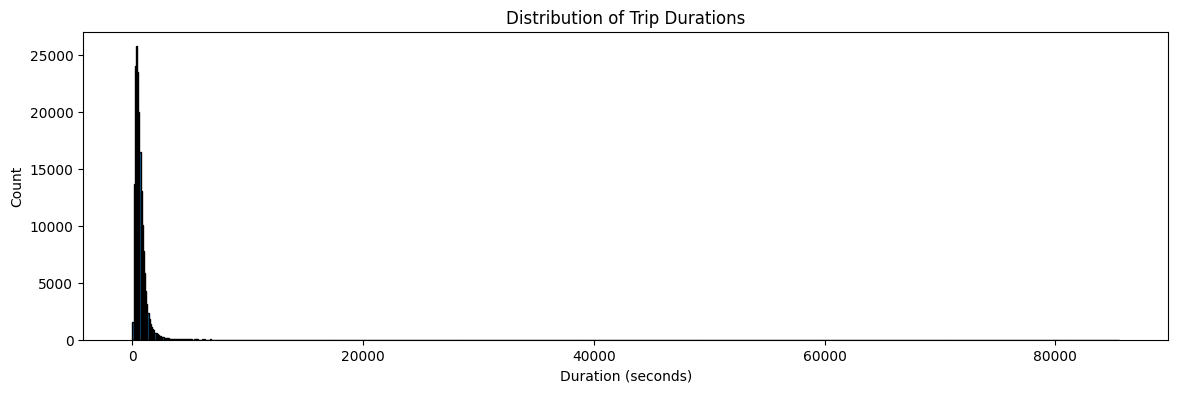

In [21]:
# Plot a histogram of trip durations
plt.figure(figsize=(14, 4))
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.hist(df['duration_sec'], bins=bins, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trip Durations')
plt.show()


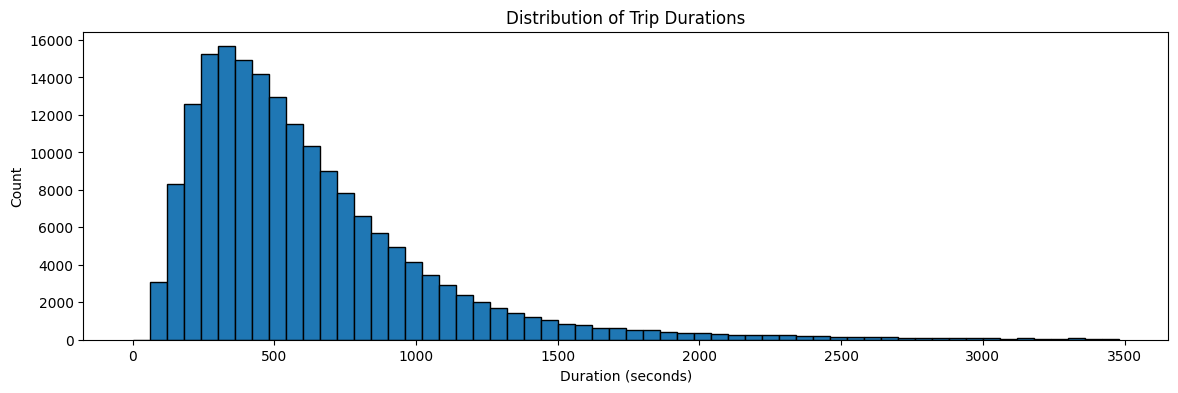

In [22]:
# Plot a histogram of trip durations excluding the outliers.
plt.figure(figsize=(14, 4))

# Use a meaningful interval (here 60 seconds / 1 minute)
bins = np.arange(0, df['duration_sec'].quantile(0.99) + 60, 60)

plt.hist(df['duration_sec'], bins=bins, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trip Durations')
plt.show()


**This visualization aims to understand the distribution of trip durations and identify any outliers or common patterns in trip lengths.**

**The histogram reveals that the majority of bike-sharing trips are short in duration, typically lasting less than 1000 seconds. However, there are outliers with very long durations.**

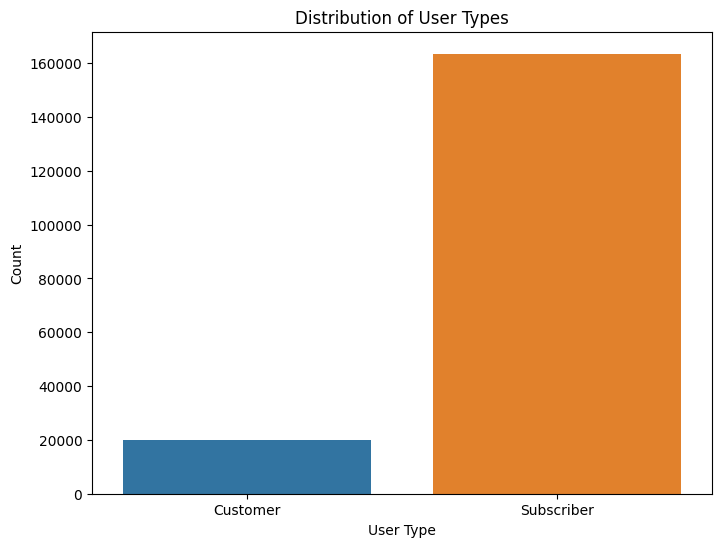

In [7]:
# Plot a bar chart of user types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types')
plt.show()


**This visualization explores the distribution of user types to understand which category (Subscriber or Customer) makes up the majority of bike-sharing users.**

**The bar chart shows that Subscribers constitute a larger portion of users compared to Customers, suggesting that the service may be more frequently used by regular users rather than occasional users.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Discuss the distribution(s) of your variable(s) of interest:**
> the variable that i interset is duration_sec and i do Distribution of Trip Durations by using histogram for this.  
as you see in figure that the most trip duration of the bike-sharing is less than 1000 second that mean the users typically use the bike-sharing service for short distances.

**Were there any unusual points?**

> there is some unusual point that in the last of the figure there some user take duration around 4000 second and this consider big number for the other trip.

**Did you need to perform any transformations?**
 
> in my opinoin i don't think there is need for transformations in this graph.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the dataset have some other features also show unusual distributions:
member_gender: There are a significant number of missing values and an "Other" category that might need special handling or further investigation to can get good insights for bike-sharing. and another thing that i think it good if we do it is it Converting features like start_time and end_time to datetime 

## Bivariate Exploration





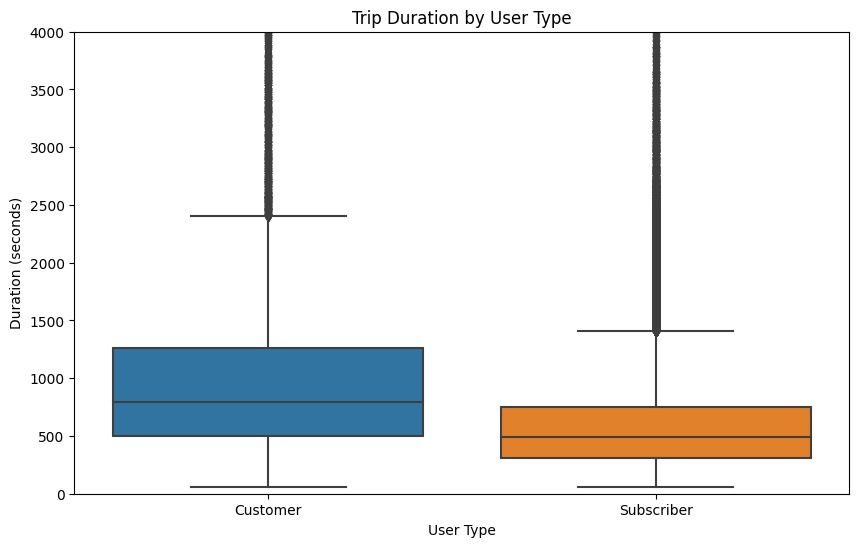

In [8]:
# Plot a box plot of trip duration by user type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.ylim(0, 4000)
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.title('Trip Duration by User Type')
plt.show()


**This plot investigates how trip durations vary between different user types (Subscribers vs. Customers).**

**The box plot illustrates that Customers tend to have longer trip durations compared to Subscribers, indicating that occasional users may use the service for longer trips or different purposes than regular subscribers.**

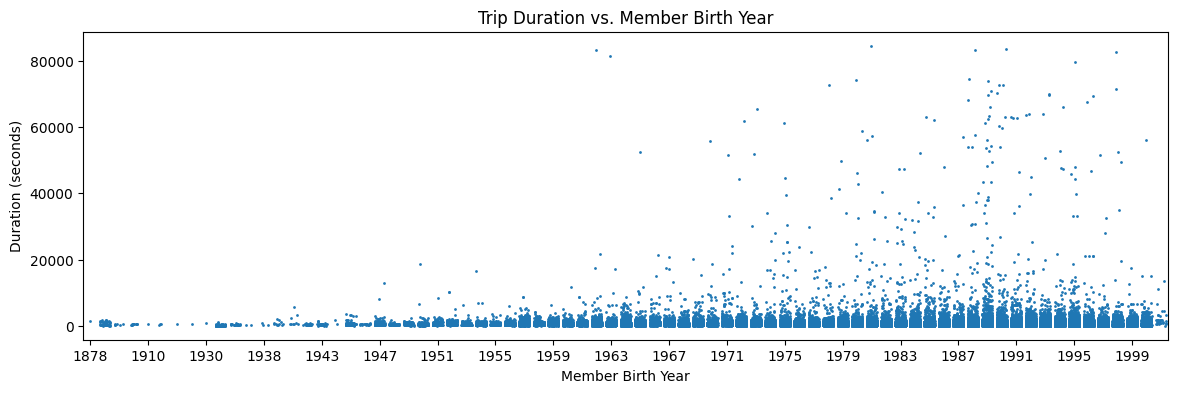

In [18]:
# Drop NaN values for birth year only
data = df.dropna(subset=['member_birth_year']).copy()

# Change birth year to int
data['member_birth_year'] = data['member_birth_year'].astype(int)

# Scatter plot of trip duration versus member birth year
plt.figure(figsize=(14, 4))
sns.stripplot(data=data, x='member_birth_year', y='duration_sec', size=2, jitter=0.35)
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (seconds)')
plt.title('Trip Duration vs. Member Birth Year')
pos, lab = plt.xticks()
plt.xticks(pos[::4], lab[::4])
plt.show()


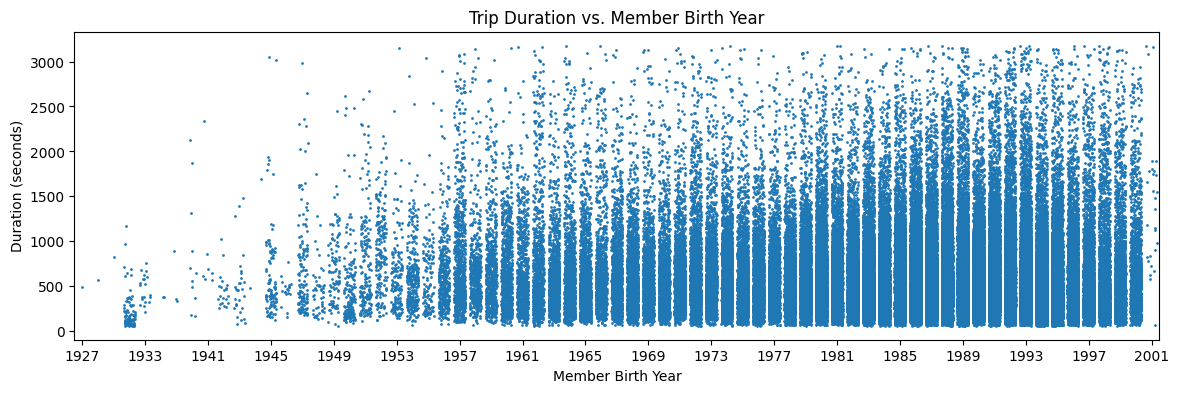

In [19]:
# Scatter plot of trip duration versus member birth year excluding the outliers.
plt.figure(figsize=(14, 4))
filtered_data = data.query('member_birth_year > 1920 and duration_sec < duration_sec.quantile(0.99)')
sns.stripplot(data=filtered_data, x='member_birth_year', y='duration_sec', size=2, jitter=0.35)
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (seconds)')
plt.title('Trip Duration vs. Member Birth Year')
pos, lab = plt.xticks()
plt.xticks(pos[::4], lab[::4])
plt.show()


**This scatter plot examines whether there's any relationship between the age of users (based on birth year) and trip durations.**

**as you see scatter plot shows you the distribution of trip durations relative to members' birth years most data points it is around shorter trip durations that mean the age of user dosen't affective in trip durations it depend in how the user will use the bike-sharing**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the box plot, it's clear that Customers tend to have longer trip durations compared to Subscribers. This relationship highlights how user type influences trip duration, that give us good insights that  users likely using the service for longer trips compared to regular subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes i observe another interesting feature is  user_type that you can make relationships with other features. for exmaple gender distribution by bser type not olny this there are many question you can ask in this feature .

## Multivariate Exploration



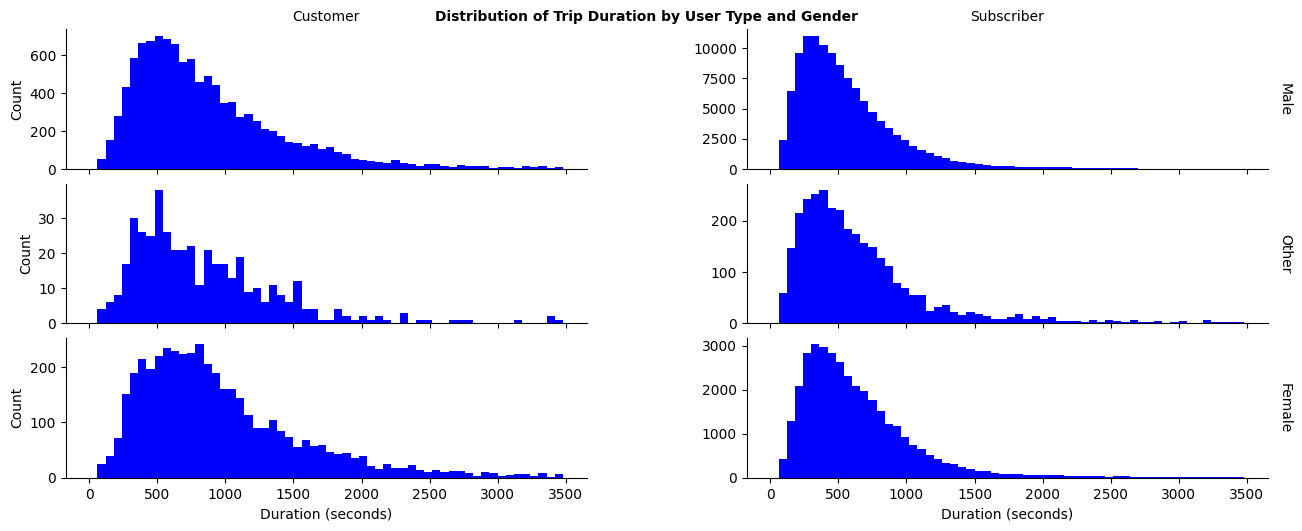

In [24]:
# Create FacetGrid for trip duration by user type and gender
g = sns.FacetGrid(df, col='user_type', row='member_gender', margin_titles=True, sharey=False)
g.map(plt.hist, 'duration_sec', bins=np.arange(0, df['duration_sec'].quantile(0.99) + 60, 60), color='blue')
g.set_axis_labels('Duration (seconds)', 'Count')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle("Distribution of Trip Duration by User Type and Gender", y=1, fontsize=10, weight='bold')
g.set(ylim=(0, None))
g.fig.set_size_inches(14, 5)

plt.show()


**this facet grid explores how trip durations vary across user types (Subscribers vs. Customers) and genders (Male, Female, Other).**

**Across all genders, Customers consistently have longer trip durations compared to Subscribers. This pattern indicates that user type (subscriber status) has a more pronounced effect on trip duration than gender alone.**

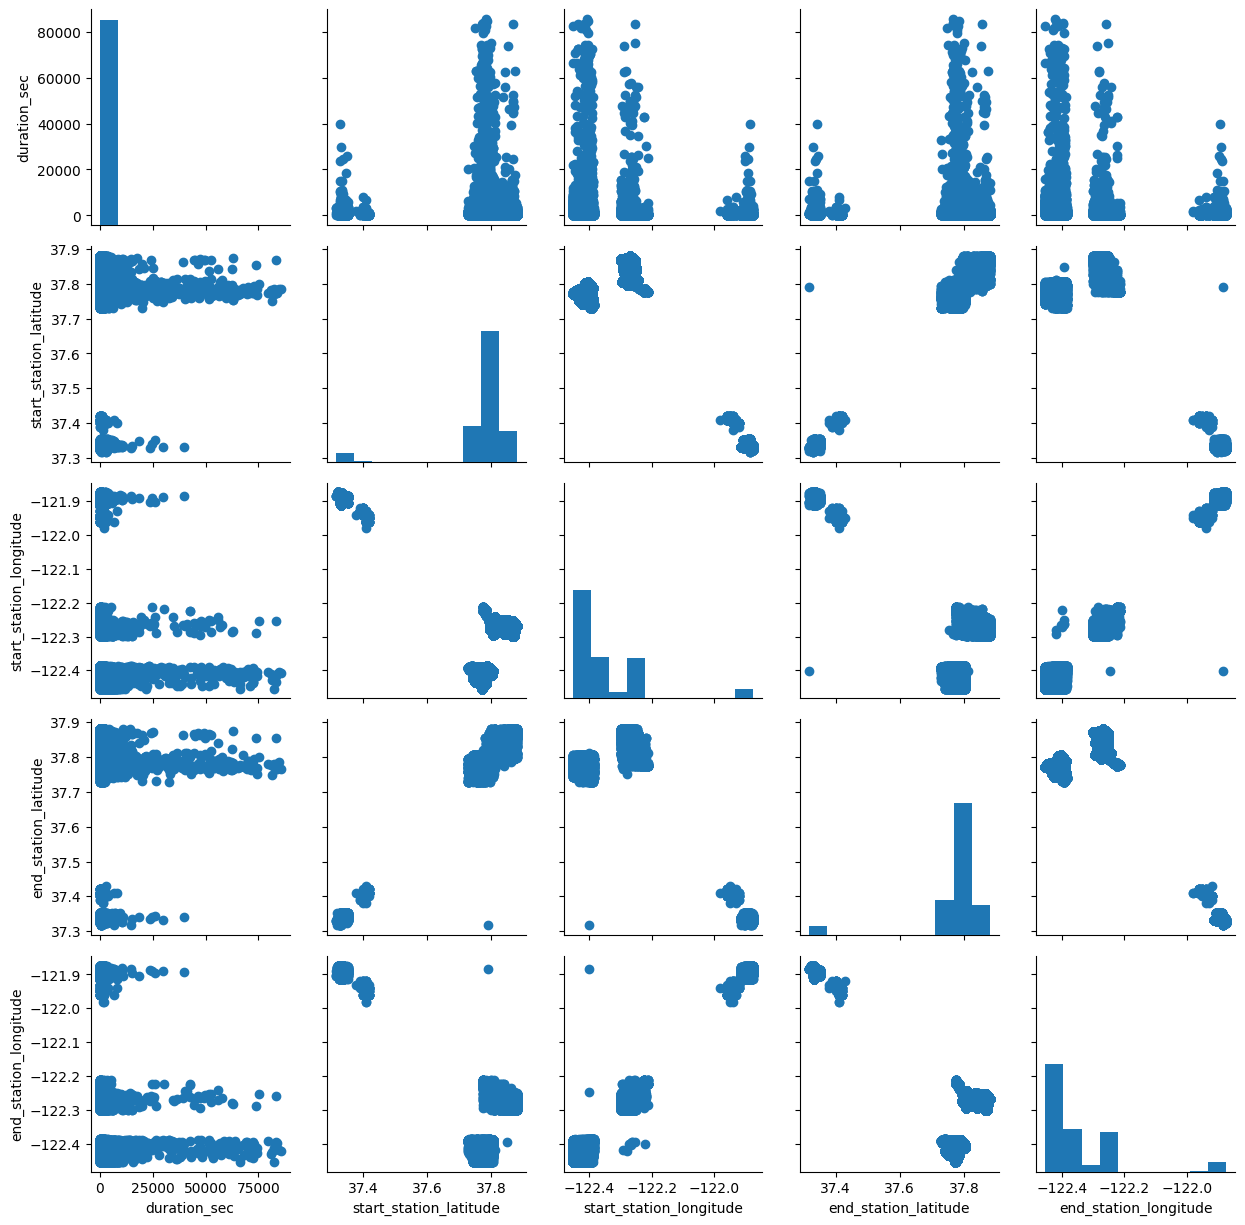

In [11]:
# Plot Matrices for Duration vs. Start/End Station Latitude/Longitude
g = sns.PairGrid(data=df, vars=['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


**This pair plot examines potential relationships between trip duration and the geographic coordinates   latitude and longitude of starting and ending stations.**

**The scatter plots in the pair plot matrix show no significant correlation between trip duration and station coordinates. This suggests that factors other than geographical location may influence trip durations.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the facet grid, we observed that across different genders, Customers generally have longer trip durations compared to Subscribers. This relationship strengthens the earlier finding that user type influences trip duration more significantly than gender alone.
### Were there any interesting or surprising interactions between features?

> The interaction between user type and gender in influencing trip durations was interesting. It showed that while there are variations in trip durations between genders within each user type, the pattern of Customers having longer trips than Subscribers was consistent across genders. 

## Conclusions
>the  majority of bike-sharing trips are short in duration.

>Subscribers make up a larger portion of users compared to occasional customers.

>Trip durations vary significantly between user types and genders.
